In [1]:
import numpy as np
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
import re
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sn
import matplotlib.pyplot as plt
import pickle
import urllib.request
import requests
from bs4 import BeautifulSoup

# Tickers

In [ ]:
#import tickers
ticker30 = []

# 打開文件
fo = open("30ticker.txt", "r")
 
for line in fo.readlines():
    line = line.strip()  
    ticker30.append(line)
ticker30

# Tickers_URL

In [ ]:
with open('company_ft_dic_final.pkl','rb') as f:
    dic = pickle.load(f)
#這樣一來財報的連結會被放到dic中
#dic格式：{tickers:[相關財報網址]}

tic_url = []
for j in range(30):
    tic_url.append(dic[ticker30[j]])
tic_url

# Crawl 10Q and Cut and Save

In [ ]:
FR = []
count = 0
for i in range(30):
    print(i)
    for j in range (0, len(tic_url)):
        try:
            print("j=")
            print(j)
            url=tic_url[i][j]
            res = requests.get(url)
            soup = BeautifulSoup(res.text, 'html.parser')
            soup_txt = soup.get_text().lower()
            startnum = soup_txt.count("item 2.")
            print('startnum'+str(startnum))
            if(j==0):
                if(startnum==0):
                    break
                elif(startnum==3):
                    break
                elif(startnum==1):
                    break
            if(startnum== 4):   
                start = soup_txt.find("item 2.")
                for l in range(2):
                    start = soup_txt.find("item 2.",start+1)
                for k in range(1):
                    end = soup_txt.find('item 3.',start)
            elif(startnum== 2):   
                start = soup_txt.find("item 2.")
                #for l in range(1):
                #   start = soup_txt.find("item 2.",start+1)
                for k in range(1):
                    end = soup_txt.find('item 3.',start)
            else:
                continue
            FR.append(soup_txt[start:end])
            f = open('./10Q/'+str(i)+'_'+str(j)+'.txt','a')
            f.write(FR[count])
            count+=1
        except:
            continue

# Tokenization

In [2]:
#import data
FRnum = []
fa = open('FRnum.txt')
for  line in  fa.readlines(): 
    FRnum.append(line.strip())
len(FRnum)
FR = []
dir_name = './10Q/'
for index in FRnum:
    with open(dir_name+index+'.txt') as f:
        raw = f.read()
    FR.append(raw)
num_doc = len(FR)
num_doc

233

In [3]:
def tokenizer(corpus):
    #lowercasing
    corpus = [doc.strip().lower() for doc in corpus]
    
    #words tokenization/punctuation removal
    tokenizer_1 = RegexpTokenizer(r'\w+')
    corpus = [tokenizer_1.tokenize(doc) for doc in corpus]
    
    #stopword removal
    #stemming using Porter’s algorithm
    sort_out = []
    i = 0
    for doc in corpus:
        print(i)
        i+=1
        tmp = ""
        for word in doc:
            if word not in stopwords.words('english') and len(word)>1 and word.isalpha():
                word = PorterStemmer().stem(word)
                tmp+=(" "+word)
        sort_out.append(tmp)

    return sort_out



num_doc = len(FR)
#tokenization
FR = tokenizer(FR)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232


# Build ID & Term matrix

In [4]:
vectorizer = CountVectorizer()
X = (vectorizer.fit_transform(FR))
num=X.toarray()
print(vectorizer.get_feature_names())
print(num)

['aa', 'aaa', 'aaac', 'aafi', 'aag', 'aaht', 'aaja', 'aaknw', 'aam', 'aanx', 'aao', 'aapp', 'aaq', 'aardoli', 'aastabl', 'aastablemay', 'aastableoctob', 'aat', 'aav', 'aay', 'ab', 'abandon', 'abbawm', 'abbrevi', 'abbvi', 'abc', 'abd', 'abdw', 'aberdeen', 'abf', 'abhr', 'abi', 'abil', 'abk', 'abl', 'abnorm', 'abp', 'abroad', 'absenc', 'absent', 'absolut', 'absorb', 'abstain', 'abstract', 'abu', 'abuja', 'abus', 'abx', 'ac', 'aca', 'acb', 'acced', 'acceler', 'accept', 'access', 'accessori', 'accessorieswear', 'accident', 'accommod', 'accompani', 'accord', 'accordingli', 'account', 'accountingon', 'accret', 'accru', 'accrual', 'accrualbal', 'accruedin', 'accumul', 'accumulatedothercomprehensiveincomememb', 'accur', 'accuraci', 'acf', 'ach', 'achiev', 'acid', 'acip', 'acknowledg', 'acl', 'acm', 'aco', 'acompar', 'aconsum', 'acq', 'acqt', 'acquir', 'acquisit', 'acquisitio', 'acreag', 'acromegali', 'acronym', 'across', 'act', 'action', 'actionr', 'actionratingoutlookmoodi', 'activ', 'activit

In [19]:
X

<233x13431 sparse matrix of type '<class 'numpy.int64'>'
	with 158622 stored elements in Compressed Sparse Row format>

In [28]:
column_name = vectorizer.get_feature_names()
lowf = []
for i in range(X.shape[1]):
    count = 0
    for j in range(num_doc):
        count+=num[j][i]
    if(count < 10):
        lowf.append(int(i))
len(lowf)

10638

In [29]:
#int to 0,1 
for i in range(num_doc):
    for j in range(len(num[i])):
        if num[i][j]>0:
            num[i][j]=1
num

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Build Dataframe

In [30]:
df =pd.DataFrame(num,index=np.arange(num_doc),columns=vectorizer.get_feature_names())

In [38]:
for i in lowf:
    print(i)
    df = df.drop(str(column_name[int(i)]),axis = 1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
22
24
26
27
28
29
30
31
33
35
36
37
39
41
42
43
44
45
47
48
50
51
55
56
57
58
63
67
68
70
72
73
74
76
78
79
80
81
82
83
84
85
88
89
90
91
95
96
98
101
104
105
108
109
110
112
113
114
116
117
119
122
123
127
128
129
130
131
136
137
139
140
141
143
145
148
149
152
153
154
156
158
159
160
161
162
163
165
168
170
175
176
177
178
179
180
181
182
183
184
186
187
188
194
195
197
199
200
201
202
203
204
205
206
209
210
211
213
214
217
218
219
220
221
224
227
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
246
248
249
250
251
252
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
293
295
296
298
300
302
303
305
307
308
310
312
315
317
319
321
326
327
328
329
331
332
333
334
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
37

2480
2481
2487
2489
2491
2492
2494
2498
2499
2500
2503
2506
2508
2510
2511
2512
2514
2517
2518
2519
2521
2522
2523
2524
2525
2526
2530
2531
2532
2533
2536
2539
2540
2541
2546
2548
2549
2552
2553
2554
2555
2556
2557
2558
2559
2560
2563
2564
2566
2567
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2606
2611
2612
2613
2616
2617
2620
2623
2624
2625
2627
2628
2629
2630
2632
2633
2634
2635
2636
2637
2638
2642
2643
2645
2646
2647
2648
2649
2650
2651
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2693
2699
2700
2702
2703
2704
2705
2706
2707
2708
2711
2712
2715
2716
2717
2719
2722
2724
2729
2730
2731
2732
2734
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764


4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4638
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4654
4655
4657
4658
4659
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4732
4733
4734
4735
4737
4738
4739
4741
4742
4743
4744
4745
4746
4749
4752
4754
4755
4757
4758
4759
4760
4761
4762
4763
4764
4765
4766
4767
4768
4769
4770
4771
4772
4773
4774
4775
4776
4777
4779
4780
4781
4782
4783
4784
4785
4786
4787
4788
4789
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800
4801
4802
4803
4804
4805
4806
4807
4808
4809
4810
4811
4812
4813
4814
4815
4816
4817
4818
4819
4820
4822
4823
4824
4827
4828
4829
4830
4831
4832
4833
4835
4836
4837
4838
4839
4840
4841
4842
4843
4844
4845
4846


6612
6614
6618
6619
6620
6621
6622
6623
6624
6626
6627
6629
6633
6634
6635
6636
6637
6638
6640
6641
6642
6643
6644
6646
6649
6650
6651
6654
6655
6656
6657
6658
6661
6662
6664
6665
6666
6667
6668
6669
6670
6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683
6684
6685
6686
6687
6690
6691
6692
6693
6694
6695
6696
6697
6698
6699
6700
6701
6703
6704
6705
6706
6707
6709
6710
6711
6712
6713
6714
6715
6716
6717
6718
6719
6720
6721
6722
6723
6724
6725
6726
6727
6728
6729
6730
6731
6732
6733
6734
6735
6736
6737
6738
6739
6741
6742
6743
6744
6745
6746
6747
6748
6749
6750
6751
6752
6753
6754
6755
6756
6757
6758
6759
6760
6761
6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6775
6776
6777
6778
6779
6780
6782
6783
6784
6785
6786
6788
6789
6795
6798
6799
6800
6802
6804
6805
6806
6807
6808
6809
6810
6811
6812
6814
6815
6817
6818
6819
6821
6822
6824
6825
6826
6827
6828
6829
6830
6831
6835
6836
6838
6840
6841
6842
6843
6844
6845
6846
6847
6852
6854
6856
6857
6861
6862
6864
6868
6869


8573
8574
8575
8577
8578
8579
8582
8583
8584
8585
8586
8587
8589
8590
8591
8592
8603
8605
8606
8608
8609
8614
8616
8617
8619
8620
8621
8624
8627
8628
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8643
8644
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8678
8680
8681
8682
8683
8684
8685
8686
8687
8688
8690
8691
8694
8695
8703
8704
8705
8706
8707
8708
8710
8711
8713
8714
8715
8716
8717
8718
8720
8721
8726
8727
8728
8729
8735
8737
8743
8744
8745
8747
8748
8749
8750
8751
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8774
8777
8778
8780
8783
8784
8785
8787
8788
8789
8790
8791
8794
8796
8797
8798
8799
8800
8801
8802
8803
8805
8806
8808
8809
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8830
8832
8834
8835
8836
8837
8838
8839
8842
8846
8848
8850
8851
8852
8853
8854
8856
8857
8859
8860
8861
8862
8863
8864


10809
10811
10812
10816
10817
10818
10819
10820
10822
10823
10824
10825
10826
10827
10829
10830
10832
10834
10838
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10854
10855
10856
10858
10860
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10905
10906
10907
10908
10911
10913
10914
10915
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10940
10942
10944
10947
10950
10951
10952
10953
10954
10956
10957
10959
10960
10962
10964
10965
10967
10969
10973
10975
10977
10978
10979
10980
10981
10983
10984
10985
10986
10987
10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11014
11016
11017
11018
11019
11020
11022
1102

12553
12554
12556
12558
12559
12560
12561
12562
12563
12564
12565
12566
12567
12568
12569
12570
12571
12572
12573
12574
12575
12576
12577
12578
12579
12580
12582
12583
12584
12585
12586
12587
12588
12589
12590
12591
12592
12593
12594
12595
12596
12597
12598
12599
12600
12601
12602
12603
12604
12605
12606
12607
12608
12609
12610
12611
12612
12613
12614
12615
12616
12617
12619
12620
12621
12622
12623
12624
12625
12626
12627
12628
12629
12630
12631
12632
12633
12635
12636
12637
12638
12639
12640
12641
12642
12643
12644
12645
12646
12647
12648
12649
12650
12651
12652
12653
12654
12655
12658
12661
12663
12664
12665
12666
12667
12668
12669
12670
12671
12672
12673
12674
12675
12676
12677
12678
12679
12680
12681
12682
12683
12684
12685
12686
12687
12688
12689
12690
12691
12692
12693
12694
12695
12696
12697
12699
12700
12701
12703
12704
12705
12706
12707
12708
12709
12710
12711
12712
12713
12714
12715
12716
12717
12718
12719
12720
12721
12722
12723
12724
12725
12726
12727
12728
12729
12730
1273

In [39]:
df

,aa,abandon,abbrevi,abc,abil,abl,absenc,absolut,abus,aca,...,zealand,zeldox,zero,zithromax,zmax,zoeti,zoloft,zone,zosyn,zyvox
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Co-occurence Matrix

In [40]:
df_asint = df.astype(int)
coocc = df_asint.T.dot(df_asint)
cooccurrence_matrix_diagonal = np.diagonal(coocc)
with np.errstate(divide='ignore', invalid='ignore'):
    cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(coocc, cooccurrence_matrix_diagonal[:, None]))
print(cooccurrence_matrix_percentage)

[[1.         0.11290323 0.29032258 ... 0.35483871 0.08064516 0.19354839]
 [0.58333333 1.         0.         ... 0.58333333 0.         0.        ]
 [0.6        0.         1.         ... 0.1        0.36666667 0.63333333]
 ...
 [1.         0.31818182 0.13636364 ... 1.         0.         0.        ]
 [0.35714286 0.         0.78571429 ... 0.         1.         1.        ]
 [0.48       0.         0.76       ... 0.         0.56       1.        ]]


In [45]:
df.columns

Index(['aa', 'abandon', 'abbrevi', 'abc', 'abil', 'abl', 'absenc', 'absolut',
       'abus', 'aca',
       ...
       'zealand', 'zeldox', 'zero', 'zithromax', 'zmax', 'zoeti', 'zoloft',
       'zone', 'zosyn', 'zyvox'],
      dtype='object', length=2793)

In [46]:
df_2 =pd.DataFrame(cooccurrence_matrix_percentage,index=df.columns,columns=df.columns)
df_2

,aa,abandon,abbrevi,abc,abil,abl,absenc,absolut,abus,aca,...,zealand,zeldox,zero,zithromax,zmax,zoeti,zoloft,zone,zosyn,zyvox
aa,1.000000,0.112903,0.290323,0.016129,0.806452,0.661290,0.467742,0.241935,0.064516,0.112903,...,0.129032,0.129032,0.306452,0.193548,0.145161,0.080645,0.145161,0.354839,0.080645,0.193548
abandon,0.583333,1.000000,0.000000,0.000000,0.583333,0.833333,0.583333,0.000000,0.000000,0.000000,...,0.416667,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.583333,0.000000,0.000000
abbrevi,0.600000,0.000000,1.000000,0.033333,1.000000,0.666667,0.200000,0.500000,0.233333,0.466667,...,0.300000,0.200000,0.300000,0.566667,0.433333,0.500000,0.400000,0.100000,0.366667,0.633333
abc,0.076923,0.000000,0.076923,1.000000,1.000000,0.153846,0.076923,0.076923,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
abil,0.390625,0.054688,0.234375,0.101562,1.000000,0.453125,0.226562,0.164062,0.078125,0.109375,...,0.093750,0.093750,0.140625,0.179688,0.148438,0.117188,0.140625,0.171875,0.109375,0.195312
abl,0.554054,0.135135,0.270270,0.027027,0.783784,1.000000,0.337838,0.148649,0.108108,0.135135,...,0.148649,0.121622,0.243243,0.216216,0.135135,0.108108,0.135135,0.229730,0.108108,0.216216
absenc,0.690476,0.166667,0.142857,0.023810,0.690476,0.595238,1.000000,0.285714,0.000000,0.095238,...,0.142857,0.023810,0.071429,0.095238,0.023810,0.071429,0.047619,0.452381,0.000000,0.095238
absolut,0.714286,0.000000,0.714286,0.047619,1.000000,0.523810,0.571429,1.000000,0.238095,0.619048,...,0.428571,0.000000,0.142857,0.428571,0.190476,0.476190,0.190476,0.285714,0.095238,0.476190
abus,0.400000,0.000000,0.700000,0.000000,1.000000,0.800000,0.000000,0.500000,1.000000,0.600000,...,0.100000,0.400000,0.000000,1.000000,0.700000,0.600000,0.600000,0.000000,0.600000,1.000000
aca,0.500000,0.000000,1.000000,0.000000,1.000000,0.714286,0.285714,0.928571,0.428571,1.000000,...,0.642857,0.000000,0.214286,0.714286,0.357143,0.785714,0.357143,0.000000,0.214286,0.785714


# Output File

In [47]:
df_2.to_csv('co-occurancy_matrix_keywords.csv')

# Heat Map

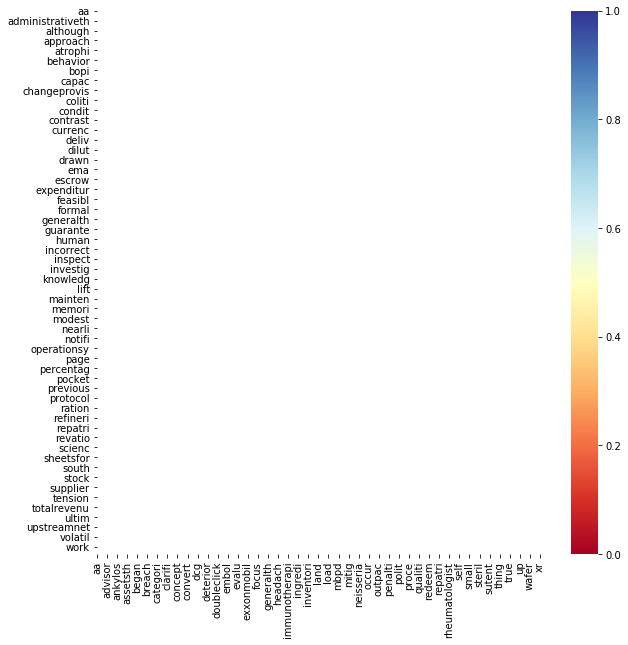

In [48]:
plt.figure(figsize=(10,10))
sn.heatmap(df_2,linewidths=0.25,linecolor='white',cmap='RdYlBu')
plt.savefig("map.png")
plt.show()